In [1]:
import torchio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

surfaces = []
surfaces.append(1/(1+np.exp(-X-Y)))
surfaces.append(np.exp(X/2))
surfaces.append(np.exp(Y/2))
surfaces.append(np.exp((X+Y)/4))
surfaces.append(np.sin((X+Y)/2))
surfaces.append(np.cos((X+Y)/2))

surfaces = np.array([surfaces])

In [3]:
print(X.shape)
print(Y.shape)
print(surfaces.shape)

(100, 100)
(100, 100)
(1, 6, 100, 100)


In [4]:
def plot_surfaces(surfaces):
    fig = plt.figure(figsize=(12, 16))
    for i in range(surfaces.shape[1]):
        ax = fig.add_subplot(surfaces.shape[1]//2, 2, i+1, projection='3d')
        ax.plot_surface(X, Y, surfaces[0, i, :, :], alpha=1)
    plt.show()

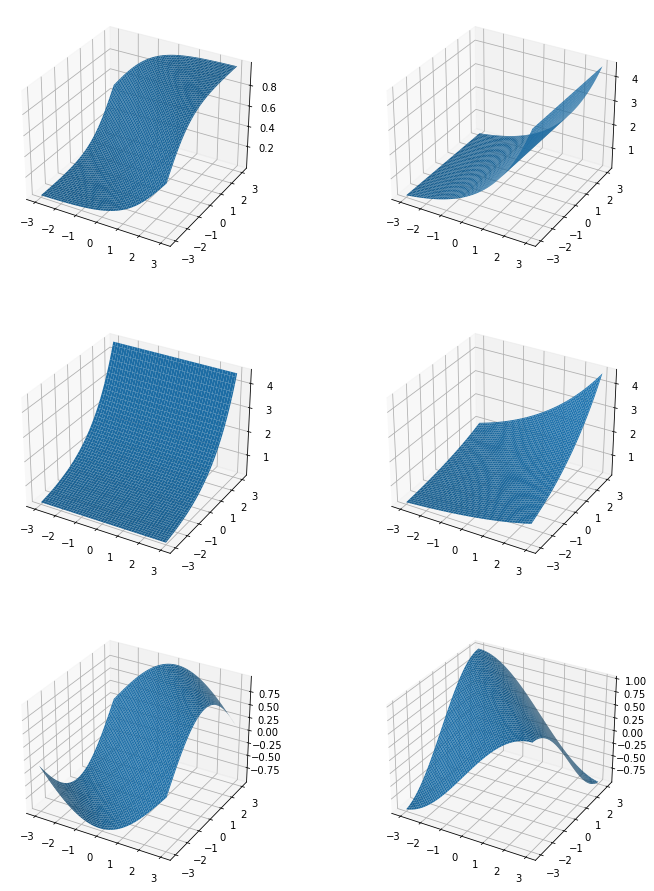

In [5]:
plot_surfaces(surfaces)

In [6]:
transform = torchio.Compose([
    torchio.RandomNoise(mean=0.0, std=(0, 0.05)),
    torchio.RandomFlip((1, 2))
])

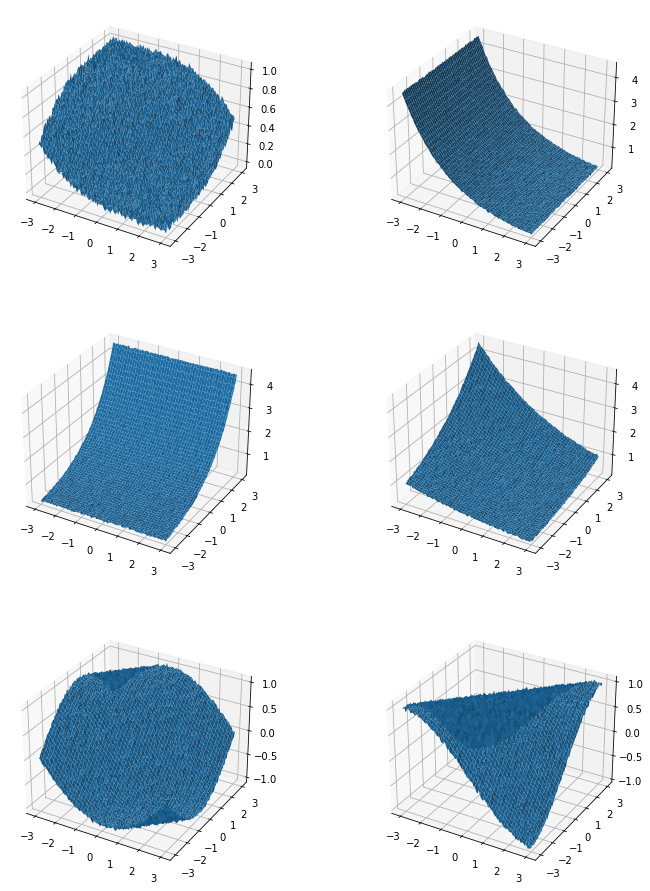

In [7]:
res = transform(surfaces)
plot_surfaces(res)